In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/input_data/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/input_data/kaggle/IRIS.csv


# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [4]:
df=pd.read_csv('/content/input_data/kaggle/IRIS.csv')

# Data Exploration

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# EDA and Visualization

<Axes: xlabel='species', ylabel='count'>

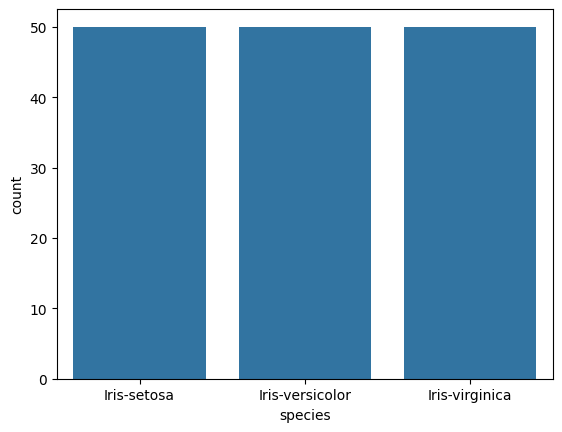

In [11]:
sns.countplot(x='species',data=df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

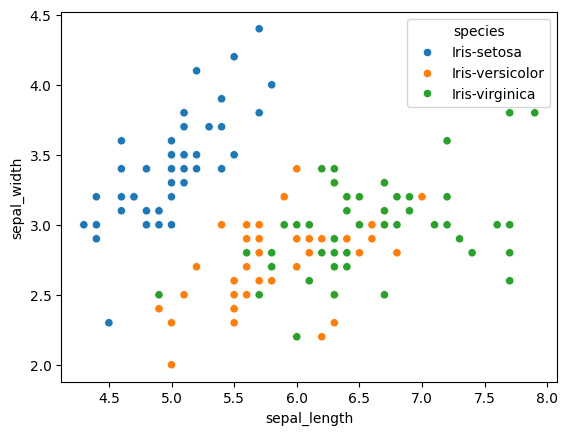

In [12]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

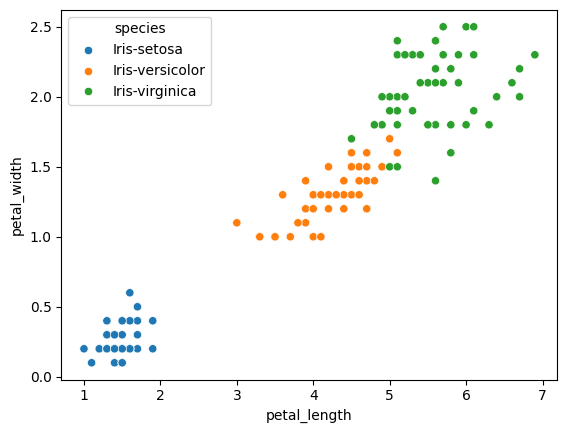

In [13]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

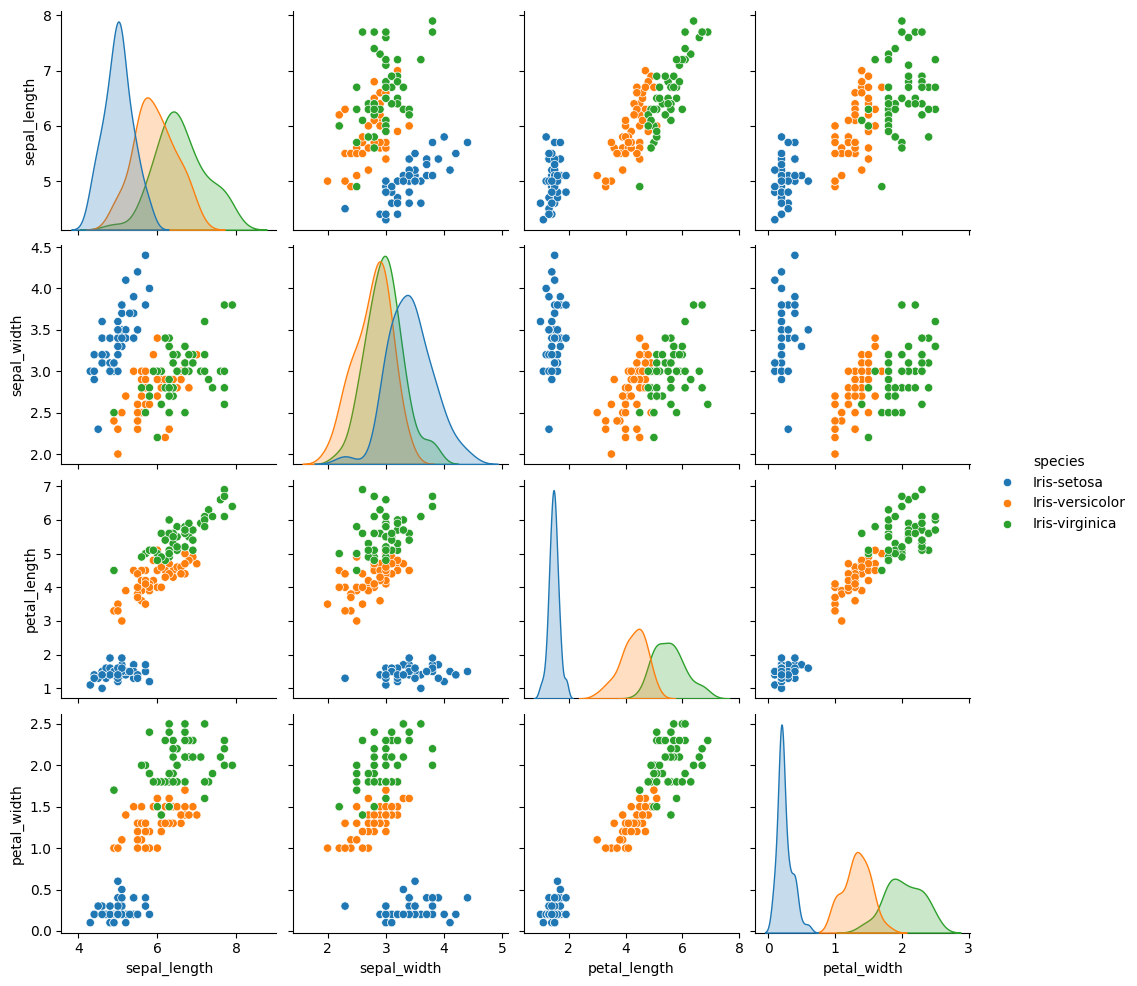

In [14]:
sns.pairplot(data=df,hue='species');

In [15]:
num_col=df[['petal_width','sepal_length','sepal_width','petal_length']]


<Axes: >

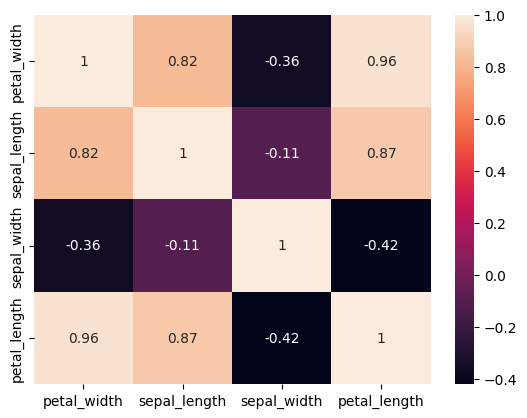

In [16]:
sns.heatmap(num_col.corr(),annot=True)

In [17]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

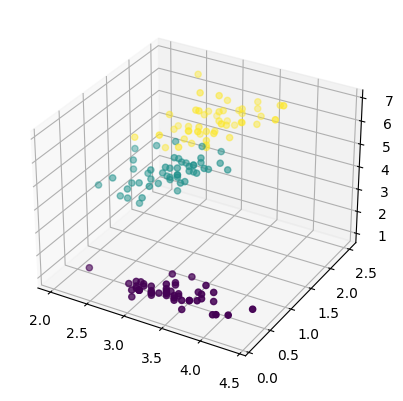

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

# Train Test split and Scaling

In [19]:
X=df.drop('species',axis=1)

In [20]:
y=df['species']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [24]:
scaler=StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Multi class Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [28]:
log_model=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

# GridSearch for Best Hyperparameters

In [29]:
penalty=['l1','l2']

In [30]:
C=np.logspace(0,4,10)

In [31]:
grid_model=GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [32]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [44]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}